In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

matplotlib.use("TkAgg")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [72]:
Ts = 1e-3
t0 = 0
t1 = 15
t = np.arange(t0, t1 + Ts, Ts)

N = len(t)

In [73]:
x_0 = 5
P_T = 5 # H = 5 => Phi = 5 => P(T) = 5
x = np.zeros((N, 1))
P = np.zeros((N, 1))
u = np.zeros((N, 1))

x[0, 0] = x_0
P[N - 1, 0] = P_T

a = -0.2


In [74]:
def dot_x(x: np.ndarray, u: np.float64) -> np.float64:
    return a * x[0] + u

def dot_P(P: np.ndarray) -> np.float64:
    return 2 * P[0]**2 - 2 * a * P[0]

In [75]:
eps = 1e-8
iters = 0
w = 0.9

while iters <= 1000:
    iters += 1
    print(f"Iteration {iters}...")
    
    u_old = u.copy()

    for k in range(N - 1):
        xp = x[k, 0] + Ts * dot_x(x[k], u[k])

        x[k + 1, 0] = x[k, 0] + Ts / 2 * (dot_x(x[k], u[k]) + dot_x(xp, u[k + 1]))

    for k in range(N - 1):
        P[N - 2 - k, 0] = P[N - 1 - k, 0] - Ts * dot_P(P[N - k - 1])


    for k in range(N):
        u_new = -2 * P[k, 0] * x[k, 0]
        u[k] = w**iters * u[k] + (1 - w**iters) * u_new 

    if sum(np.abs(u - u_old)) - eps * sum(np.abs(u)) <= 0:
        break

Iteration 1...
Iteration 2...
Iteration 3...
Iteration 4...
Iteration 5...
Iteration 6...
Iteration 7...
Iteration 8...
Iteration 9...
Iteration 10...
Iteration 11...
Iteration 12...
Iteration 13...
Iteration 14...
Iteration 15...
Iteration 16...
Iteration 17...
Iteration 18...
Iteration 19...
Iteration 20...
Iteration 21...


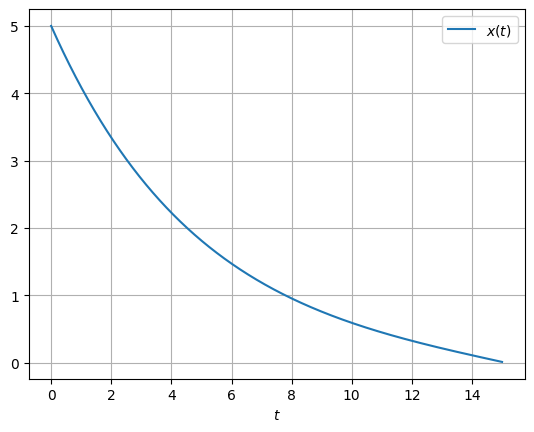

In [76]:
# plt.rcParams["text.usetex"] = True

plt.plot(t, x)
plt.grid()
plt.legend([r"$x(t)$"])
plt.xlabel(r"$t$")

plt.show()


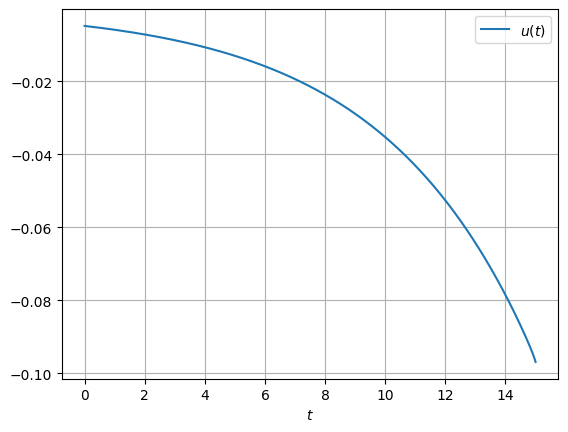

In [77]:
plt.plot(t, u)
plt.grid()
plt.legend([r"$u(t)$"])
plt.xlabel(r"$t$")

plt.show()
